In [8]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from manopth.manolayer import ManoLayer
from utils.modelUtils import *

In [15]:
mano_layer = ManoLayer(side='right', mano_root = "/home/workplace/HOnnotate_OXR/modules/manopth/mano/models", use_pca=False, flat_hand_mean=True, center_idx=0, ncomps=45, root_rot_mode="axisang", joint_rot_mode="axisang").cuda()

In [42]:
glob_rot_range = 6.28
rot_max_list = np.array([   
    glob_rot_range, glob_rot_range, glob_rot_range,                     #0
    0.25, 0.5, 1.5,                                                     #1
    0.0, 0.0, 1.5,                                                      #2
    0.0, 0.0, 1.5,                                                      #3
    0.25, 0.5, 1.5,                                                     #4
    0.0, 0.0, 1.5,                                                      #5
    0.0, 0.0, 1.5,                                                      #6
    0.25, 0.5, 1.5,                                                     #7
    1.0, 0.0, 1.5,                                                      #8
    0.0, 0.0, 1.5,                                                      #9
    0.25, 0.5, 1.5,                                                     #10
    0.0, 0.0, 1.5,                                                      #11
    0.0, 0.0, 1.5,                                                      #12
    -0.5, 0.5, 1.5,                                                     #13
    0.0, 0.5, 0.0,                                                      #14
    0.0, 1.0, -0.5                                                      #15
])

In [49]:
glob_rot_range = 6.28
rot_min_list = np.array([
    -glob_rot_range, -glob_rot_range, -glob_rot_range,                  #0
    -0.25, -0.5, -1.0,                                                  #1
    0.0, 0.0, -1.0,                                                     #2
    0.0, 0.0, -0.3,                                                     #3
    -0.25, -0.5, -1.0,                                                  #4
    0.0, 0.0, -1.0,                                                     #5
    0.0, 0.0, -0.2,                                                     #6
    -0.25, -0.5, -1.25,                                                 #7
    -1.0, 0.0, -0.75,                                                   #8
    0.0, 0.0, -0.75,                                                    #9
    -0.25, -0.5, -1.0,                                                  #10
    0.0, 0.0, -1.0,                                                     #11
    0.0, 0.0, -0.5,                                                     #12
    -0.5, -1.0, -1.0,                                                   #13
    0.0, -1.0, 0.0,                                                     #14
    0.0, -1.5, -0.5                                                     #15
])

In [143]:
pose_mean_list = np.array([
    0.012990133975529916, -0.2061533137671232, 0.1217358369522687, #0
    0.0, 0.0, -0.26776195873424913, #3
    0.0, 0.0, 0.1463492324860077, -0.019004827777825577, #6
    0.045829039124687755, 0.008727056210913353, 0.0,  #9
    0.0, -0.1284752811149675, #12
    0.0, 0.0, 0.23133631452056908, #15
    -0.026223380872148847, 0.13406619518188134, -0.24682822100890117, #18
    0.08579138535571655, 0.0, -0.08518110410666833, #21
    0.0, 0.0, 0.5096552875298644, #24
    -0.024652840864526005, -0.030070189038857012, -0.026405485406310773, #27
    0.0, 0.0, -0.10829962287750862, #30
    0.0, 0.0, 0.2650733518398053, #33
    -0.5, -0.27061772045666727, 0.26407928733983543, #36
    0.0, 0.07141815208289819, 0.0, #39
    0.0, -0.23984496193594806, -0.5 #42
])

In [144]:
rot_max = torch.from_numpy(rot_max_list.reshape(1, 48)).float().cuda()

In [145]:
rot_min = torch.from_numpy(rot_min_list.reshape(1, 48)).float().cuda()

In [146]:
pose_mean = torch.from_numpy(pose_mean_list.reshape(1, 45)).float().cuda()

In [220]:
pose_mean = torch.from_numpy(pose_mean_list.reshape(1, 45)).float().cuda()
idx = 9
pose_mean[:, idx*3:idx*3+3] = rot_max[:, (idx+1)*3:(idx+1)*3+3]
idx = 10
pose_mean[:, idx*3:idx*3+3] = rot_max[:, (idx+1)*3:(idx+1)*3+3]

In [233]:
initial_rot = torch.tensor([[-1.7276, -1.6758, 2.1557]]).cuda()
input_rot = clip_mano_hand_rot(initial_rot).cuda()
input_pose = torch.zeros((1, 45), dtype=torch.float32).cuda()
input_shape = torch.zeros(1, 10).cuda()
pose_all = torch.cat((input_rot, input_pose), 1).cuda()

In [286]:
pose_mean = torch.from_numpy(pose_mean_list.reshape(1, 45)).float().cuda()
idx = 11
pose_mean[:, idx*3:idx*3+3] = rot_min[:, (idx+1)*3:(idx+1)*3+3]

In [287]:
pose_all = torch.cat((input_rot, pose_mean), 1).cuda()

In [288]:
vert, joint = mano_layer(pose_all, th_betas=input_shape)

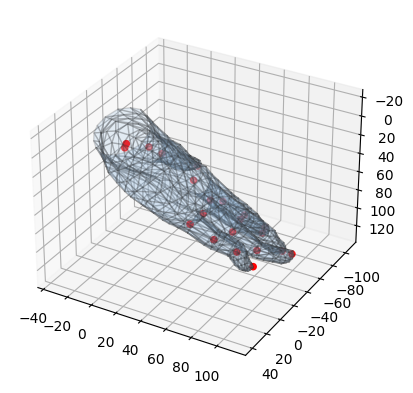

In [289]:
demo.display_hand({'verts':vert.cpu(), 'joints':joint.cpu()}, mano_faces=mano_layer.th_faces.cpu())

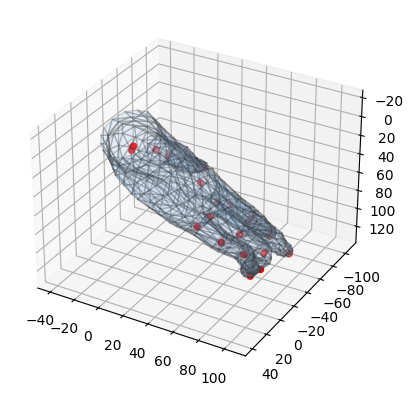

In [209]:
demo.display_hand({'verts':vert.cpu(), 'joints':joint.cpu()}, mano_faces=mano_layer.th_faces.cpu())

In [225]:
vert, joint = mano_layer(rot_max, th_betas=input_shape)

In [51]:
vert, joint = mano_layer(rot_min, th_betas=input_shape)

In [47]:
from manopth import demo

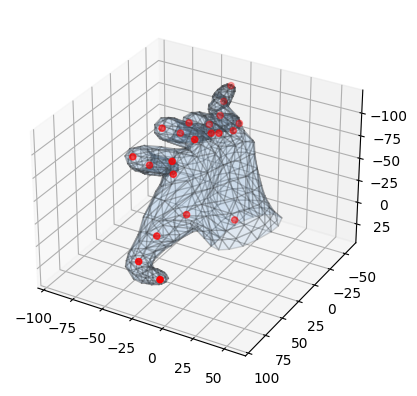

In [226]:
demo.display_hand({'verts':vert.cpu(), 'joints':joint.cpu()}, mano_faces=mano_layer.th_faces.cpu())

In [ ]:
re = torch.tensor([-1.3302, -2.1072,  1.7297,  0.0149, -0.1053, -0.0313,  0.0000,  0.0000,
          0.3774,  0.0000,  0.0000,  0.8467, -0.0152,  0.2342,  0.3015,  0.0000,
          0.0000,  0.2794,  0.0000,  0.0000,  0.3504, -0.0101,  0.5000,  0.0412,
          0.1016,  0.0000, -0.7500,  0.0000,  0.0000, -0.7500, -0.0168, -0.0533,
          0.1586,  0.0000,  0.0000, -1.0000,  0.0000,  0.0000, -0.5000, -0.5000,
          0.4783,  0.2730,  0.0000, -0.2221,  0.0000,  0.0000, -1.3985, -0.5000], dtype=torch.float32).cuda()